In [1]:
#import pandas
import pandas as pd
import numpy as np
# load dataset
pima = pd.read_csv("pop_snps.csv")

In [2]:
pima.head()

,subject,phenotype,rs1003306_A,rs1003306_T,rs1003306_C,rs1003306_G,rs1011340_A,rs1011340_T,rs1011340_C,rs1011340_G,...,rs986642_C,rs986642_G,rs998401_A,rs998401_T,rs998401_C,rs998401_G,rs9993173_A,rs9993173_T,rs9993173_C,rs9993173_G
0,hu91BD69,1,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,1
1,hu42B208,0,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,0,2,0,0
2,huBFEDCE,1,0,0,0,0,0,0,2,0,...,2,0,0,0,0,0,0,2,0,0
3,hu7AC640,1,0,0,0,0,1,0,1,0,...,2,0,0,0,0,0,0,1,0,1
4,huA3A815,1,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,0,2,0,0


In [3]:
pima['subject']

0     hu91BD69
1     hu42B208
2     huBFEDCE
3     hu7AC640
4     huA3A815
5     hu409F2D
6     hu6E9C24
7     hu41ED75
8     huD83C6C
9     hu993257
10    hu5F0DCB
11    huBE8E0C
12    hu3F864B
13    hu606C9D
14    hu82436A
15    huB828CB
16    hu43860C
17    huDDE04F
18    huF99A55
19    hu0B51B8
20    hu00147A
21    hu345185
22    hu448C4B
23    huDDEC1D
24    hu7ECB9C
25    hu83E9B9
26    hu459AD0
27    huA5FD8B
28    huC4F2BB
29    hu39D07D
30    hu44DCFF
31    hu84B706
32    hu48C4EB
Name: subject, dtype: object

In [8]:
#split dataset in features and target variable
feature_cols = list(pima.columns)
feature_cols = feature_cols[1:-1]
print(feature_cols)

['phenotype', 'rs1003306_A', 'rs1003306_T', 'rs1003306_C', 'rs1003306_G', 'rs1011340_A', 'rs1011340_T', 'rs1011340_C', 'rs1011340_G', 'rs1024487_A', 'rs1024487_T', 'rs1024487_C', 'rs1024487_G', 'rs10255965_A', 'rs10255965_T', 'rs10255965_C', 'rs10255965_G', 'rs1032143_A', 'rs1032143_T', 'rs1032143_C', 'rs1032143_G', 'rs1032355_A', 'rs1032355_T', 'rs1032355_C', 'rs1032355_G', 'rs103294_A', 'rs103294_T', 'rs103294_C', 'rs103294_G', 'rs10431948_A', 'rs10431948_T', 'rs10431948_C', 'rs10431948_G', 'rs1045873_A', 'rs1045873_T', 'rs1045873_C', 'rs1045873_G', 'rs10458810_A', 'rs10458810_T', 'rs10458810_C', 'rs10458810_G', 'rs10460810_A', 'rs10460810_T', 'rs10460810_C', 'rs10460810_G', 'rs10483853_A', 'rs10483853_T', 'rs10483853_C', 'rs10483853_G', 'rs10484547_A', 'rs10484547_T', 'rs10484547_C', 'rs10484547_G', 'rs10486207_A', 'rs10486207_T', 'rs10486207_C', 'rs10486207_G', 'rs10493430_A', 'rs10493430_T', 'rs10493430_C', 'rs10493430_G', 'rs10494870_A', 'rs10494870_T', 'rs10494870_C', 'rs1049487

In [9]:
X = pima[feature_cols] # Features
y = pima['phenotype'] # Target variable

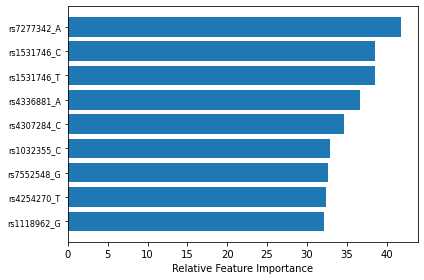

In [37]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

#Scale your data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

pos = pos[-10:-1]
sorted_idx = sorted_idx[-10:-1]
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [19]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [20]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [32]:
coef = logreg.coef_
print(coef)

[[-0.23576534 -0.19219337 -0.17498492 ...  0.20981111  0.23577696
   0.33757191]]


In [31]:
coef.sort()
print(coef)

[[-0.23576534 -0.19219337 -0.17498492 ...  0.20981111  0.23577696
   0.33757191]]


In [21]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3, 0],
       [1, 5]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

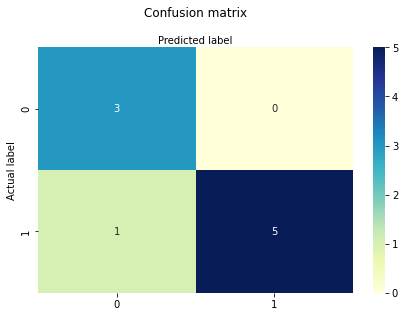

In [22]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [23]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.75      1.00      0.86         3
   with diabetes       1.00      0.83      0.91         6

        accuracy                           0.89         9
       macro avg       0.88      0.92      0.88         9
    weighted avg       0.92      0.89      0.89         9



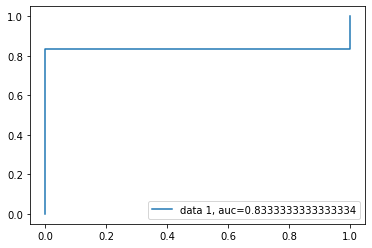

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()